https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e

http://techscouter.blogspot.com/2018/08/doc2vec-document-vectorization-and.html

In [32]:
%whos

Variable         Type        Data/Info
--------------------------------------
Doc2Vec          type        <class 'gensim.models.doc2vec.Doc2Vec'>
PCA              ABCMeta     <class 'sklearn.decomposition.pca.PCA'>
TaggedDocument   type        <class 'gensim.models.doc2vec.TaggedDocument'>
common_texts     list        n=9
documents        list        n=9
fname            str         C:\Users\CAMNG3\AppData\L<...>cal\Temp\my_doc2vec_model
get_tmpfile      function    <function get_tmpfile at 0x000002666D2B69D8>
i                int         0
model            Doc2Vec     Doc2Vec(dm/m,d5,n5,w5,s0.001,t4)
model_2_dim      list        n=0
pca              PCA         PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
vector           ndarray     5: 5 elems, type `float32`, 20 bytes


# Doc2vec ... build a model from scratch

Doc2vec is an unsupervised computer algorithm to generate vectors for sentence/paragraphs/documents. The algorithm is an adaptation of word2vec which can generate vectors for words. Below you can see frameworks for learning word vector word2vec (left side) and paragraph vector doc2vec (right side). 

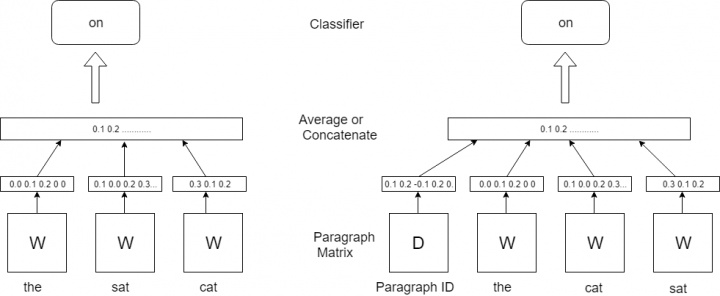

# Preparing the data

In [20]:
import pandas as pd
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import sklearn
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CAMNG3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7A75-B79E

 Directory of C:\Users\CAMNG3\Desktop\git_repo\word_embeddings

29/10/2019  10:36    <DIR>          .
29/10/2019  10:36    <DIR>          ..
28/10/2019  14:09    <DIR>          .ipynb_checkpoints
24/10/2019  10:42            11,898 a.png
24/10/2019  14:42           115,575 Different techniques to represent words as vectors (Word Embeddings).ipynb
28/10/2019  17:41           188,524 Doc2Vec Document Vectorization and clustering.ipynb
06/10/2019  22:03        54,766,492 doc2vec.bin
24/10/2019  15:43         2,282,292 drugLibTrain_raw.tsv
28/10/2019  13:05         3,451,019 ELMO COMPLETE.ipynb
24/10/2019  10:42            20,353 elmo_combination-a7af2b3eb2b5ceb37f3e9c5f2b066f14-3d61e.png
28/10/2019  11:37            75,699 embeddings-e1538523583798.png
24/10/2019  10:49            11,898 modified_input_embedding-ce183e70063bae69926ef6a79e39b764-c2cda.png
24/10/2019  11:57         9,150,992 movie_review.csv
24/10/2019  08:51

In [7]:
df=pd.read_csv('./movie_review.csv')

In [8]:
df.head()

fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos

In [9]:
df = df[['text','tag']]

In [10]:
df = df.rename(columns={'text':"raw.title"})

In [11]:
df.isnull().values.any()

False

In [12]:
#everything lowercase
df['raw.title'] = df['raw.title'].apply(lambda x : x.lower())

#removing punctuaction
punct = str.maketrans("","",string.punctuation)
df['raw.title'] = df['raw.title'].apply(lambda x : x.translate(punct))

#removing stopwords
stop = stopwords.words('english')
df['raw.title'] = df['raw.title'].apply(lambda x : [y for y in x.split() if y not in stop])

# lemmatization
lemmatizer = WordNetLemmatizer()
df['raw.title'] = df['raw.title'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) 

#remove number
df['raw.title'] = df['raw.title'].apply(lambda x : [y for y in x if y.isdigit()== False])

In [13]:
df.head()

raw.title  tag
0  [film, adapted, comic, book, plenty, success, ...  pos
1  [starter, created, alan, moore, eddie, campbel...  pos
2  [say, moore, campbell, thoroughly, researched,...  pos
3  [book, graphic, novel, page, long, includes, n...  pos
4                [word, dont, dismiss, film, source]  pos

In [14]:
df_new = df

# Splitting training and test

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new['raw.title'],df_new['tag'],
                                                    test_size=0.2, random_state=42)

In [47]:
X_train.shape

(51776,)

# Creating the doc2vec model

In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [25]:
# documents = [TaggedDocument(doc, [i]) for i,doc in enumerate(list(df_new['raw.title']))]
documents = [TaggedDocument(doc, [i]) for i,doc in enumerate(list(X_train))]

In [26]:
documents[0]

TaggedDocument(words=['patch', 'never', 'seemed', 'understand', 'possibility', 'maybe', 'maybe', 'good', 'idea', 'study', 'first', 'talk', 'patient', 'later'], tags=[0])

In [27]:
len(documents)

51776

In [28]:
len(max(list((list(documents[i][0]) for i in range(0,len(documents)))),key=len))

78

In [29]:
#size is the vector size
model = Doc2Vec(documents, vector_size=512, window=8, min_count=1, workers=-1)

In [30]:
X = [model.docvecs[i] for i in range(0,len(documents))]

These vectors now contain the embeddings of the documents and semantic meaning of the documents. We can use methods in the model to find the similar news articles.

In [206]:
#to create a new vector
vector = model.infer_vector(["merger news with verizon"])

# to find the siilarity with vector
model.similar_by_vector(vector)

c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """


[('target', 0.41234198212623596),
 ('enterprise', 0.3956466317176819),
 ('sizzling', 0.37322625517845154),
 ('analysis', 0.3623957931995392),
 ('berkshire', 0.35897281765937805),
 ('tmobilesprint', 0.34921079874038696),
 ('today', 0.3439137637615204),
 ('opinion', 0.33926597237586975),
 ('stack', 0.3306722044944763),
 ('worth', 0.32989999651908875)]

In [207]:
#  to find the most similar word to words in 2 document
model.wv.most_similar(documents[1][0])

[('verizon', 0.5442331433296204),
 ('volatile', 0.4198443591594696),
 ('hike', 0.4135645627975464),
 ('yield', 0.40245556831359863),
 ('jumped', 0.39430955052375793),
 ('payden', 0.3926742374897003),
 ('something', 0.390642374753952),
 ('plan', 0.38593536615371704),
 ('dividend', 0.37912675738334656),
 ('holding', 0.3705284297466278)]

In [208]:
documents[1][0]

['tmobile',
 'cut',
 'price',
 'try',
 'convince',
 'regulator',
 'sprint',
 'deal',
 'wonapost',
 'hurt',
 'poor',
 'customer']

In [92]:
#find similar documents to document 1
model.docvecs.most_similar(489)


[(6119, 0.19275708496570587),
 (39981, 0.1819908320903778),
 (30773, 0.18175949156284332),
 (28376, 0.17187006771564484),
 (7239, 0.1669009029865265),
 (51568, 0.1615699678659439),
 (36902, 0.1602015197277069),
 (6857, 0.15956628322601318),
 (15983, 0.15919187664985657),
 (9594, 0.1563507467508316)]

In [87]:
documents[21942]

TaggedDocument(words=['point', 'jimmy', 'prior', 'girlfriend', 'turned', 'business', 'proposition', 'felt', 'good'], tags=[21942])

In [214]:
documents[1]

TaggedDocument(words=['tmobile', 'cut', 'price', 'try', 'convince', 'regulator', 'sprint', 'deal', 'wonapost', 'hurt', 'poor', 'customer'], tags=[1])

In [215]:
documents[22]

TaggedDocument(words=['news', 'analysis', 'report', 'sprint', 'corporation', 'nyse'], tags=[22])

# Clustering the Documents

We will use the vectors created in the previous section to generate the clusters using K-means clustering algorithm. Implementation of K-means available in sklearn, so I will be using that implementation.

In [314]:
# import os

# df = pd.DataFrame()
# for file in os.listdir("unsup/"):
#      with open(os.path.join('./unsup/', file), encoding="utf8") as f:
#             content = f.read().replace('/n','')
#             df = df.append(pd.Series(content), ignore_index=True)

In [318]:
# df.to_csv("unsup.csv",index=False)

In [48]:
#import the modules
from sklearn.cluster import KMeans
import numpy as np
#create the kmeans object withe vectors created previously
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [49]:
#print all the labels
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [54]:
#suposing that neg is 1 
results = list(zip(kmeans.labels_,Y_train))

In [57]:
results[0][0]

1

In [73]:
l = sum(list(map(lambda row : 1 if (row[0] == 1 and row[1] == 'pos') or (row[0] == 0 and row[1] == 'neg') else 0, results)))/ len(results) * 100

In [74]:
l

50.04635352286774

In [75]:
#PCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=10) #reduce down to 5 dim
y = pca.fit_transform(X[:100])

y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE



In [76]:
len(kmeans.labels_)

51776

In [79]:
#create a dictionary to get cluster data
clusters={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in range(100):
    clusters[kmeans.labels_[i]].append(y[i])
# print(clusters)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

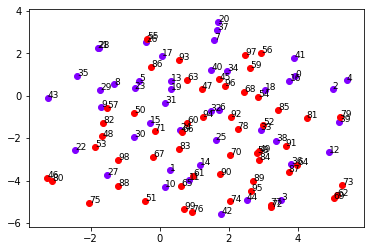

In [80]:
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import matplotlib.cm as cm
# color = ['red','green','blue','yellow']
colors = cm.rainbow(np.linspace(0, 1, 2))
i = 0
for cluster in zip(clusters.values(),colors):
    for elem in cluster[0]: 
#         set_trace()
        x = elem[0]
        y = elem[1]
        plt.scatter(x,y,c=cluster[1])
        plt.text(x+0.001, y+0.001, i, fontsize=9)
        i +=1

plt.show()


In [81]:
clusters

{0: [array([3.9312904, 0.9158079], dtype=float32),
  array([ 0.30362478, -3.5182993 ], dtype=float32),
  array([5.01598   , 0.33365583], dtype=float32),
  array([ 3.5280976, -4.9140754], dtype=float32),
  array([5.4294677 , 0.72636956], dtype=float32),
  array([-0.6051341 ,  0.68770444], dtype=float32),
  array([ 1.7186267, -0.6848749], dtype=float32),
  array([1.568092 , 2.6426628], dtype=float32),
  array([-1.3213435,  0.5373636], dtype=float32),
  array([-1.7008847 , -0.52178425], dtype=float32),
  array([ 0.16162013, -4.292908  ], dtype=float32),
  array([ 0.8557822, -3.9655802], dtype=float32),
  array([ 4.9199033, -2.6725452], dtype=float32),
  array([0.33621755, 0.69162637], dtype=float32),
  array([ 1.1638874, -3.2705967], dtype=float32),
  array([-0.2915436, -1.2679372], dtype=float32),
  array([3.7636578, 0.7096491], dtype=float32),
  array([0.07539766, 1.8998888 ], dtype=float32),
  array([3.056701  , 0.29848188], dtype=float32),
  array([0.31604892, 0.30314028], dtype=float

In [259]:
#to predict cluster for te test set
# testdoc_words = gensim.utils.simple_preprocess('Microsoft excel')
# testdoc_vector = d2vmodel.infer_vector(testdoc_words)
# cluster_label = kmeans_model.predict(array(testdoc_vector))

['market',
 'capitalization',
 'mkt',
 'watch',
 'sprint',
 'corporation',
 'nyse',
 'paccar',
 'inc',
 'nasdaqpcar',
 'philip',
 'morris']

In [244]:
clusters.values()

dict_values([[array([ 0.01456799, -0.01076629]), array([ 0.01465483, -0.02150866]), array([ 0.01944269, -0.01038983]), array([ 0.03308135, -0.00514919])], [array([-0.01323397,  0.02184572]), array([ 0.00579495, -0.01251301]), array([-0.01742987,  0.00280386]), array([0.00337306, 0.00861943]), array([-0.00107377,  0.01585267]), array([-0.03211597,  0.03833337]), array([-0.02263093,  0.02710296]), array([ 0.01685591, -0.00019239]), array([-0.02894819,  0.01182332]), array([-0.0026303 , -0.01876739]), array([-0.01327986,  0.01624997]), array([0.00923461, 0.0240605 ]), array([-0.00254055,  0.01315683]), array([-0.00990001,  0.00602944]), array([0.00406275, 0.0229524 ]), array([ 0.00016451, -0.00733045]), array([-0.01249723, -0.00352227])], [array([0.02395288, 0.03720721]), array([0.02621036, 0.01628069]), array([0.0215561 , 0.00363205]), array([0.03407758, 0.0201088 ]), array([0.02998467, 0.00938425]), array([-0.00686088,  0.00917959])], [array([0.00103102, 0.00370028]), array([0.01497134,